In [1]:
%config InlineBackend.figure_format = 'retina'

In [2]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd

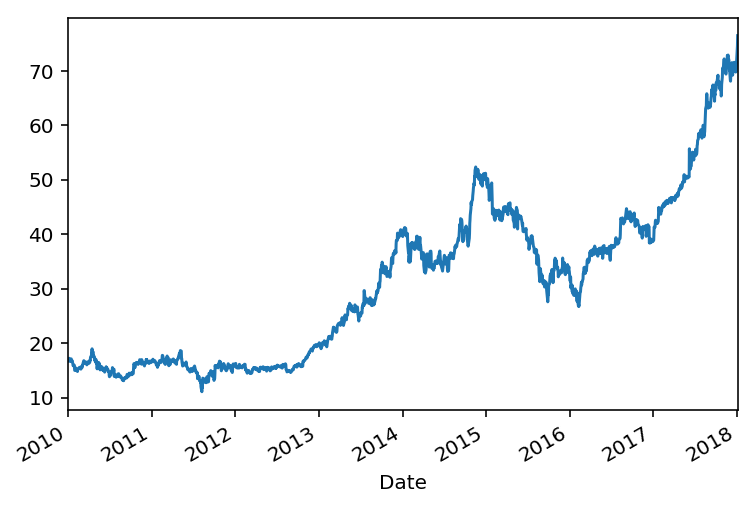

In [3]:
aaba = pdr.get_data_yahoo('AABA')
aaba['Close'].plot()
plt.show()

In [4]:
def aaba_stream(n=None):
    if n is None:
        n = 2 * len(aaba)
    
    i = 0
    for (_, row) in aaba.iterrows():
        yield row['Open']
        i += 1
        if i == n:
            break
        yield row['Close']
        i += 1
        if i == n:
            break

In [5]:
class RollingMean:
    def __init__(self, window=20):
        self.window = window
        self.values = []
    
    def process(self, value):
        self.values.append(value)
        if len(self.values) > self.window:
            self.values.pop(0)
    
    @property
    def value(self):
        if len(self.values) == self.window:
            return sum(self.values) / self.window

In [6]:
values = []
rolling_mean = RollingMean(20)
rolling_means = []
differences = []
buys = []
sells = []

for (index, value) in enumerate(aaba_stream()):
    values.append(value)
    
    rolling_mean.process(value)
    rolling_means.append(rolling_mean.value)
    
    difference = None
    if rolling_mean.value:
        difference = rolling_mean.value - value
        
        if difference > 2:
            buys.append(index)
        elif difference < -2:
            sells.append(index)
    differences.append(difference)

In [7]:
df = pd.DataFrame(data={
    'Value': values,
    'Rolling Mean': rolling_means
})

def plot(start, stop):
    df[start:stop].plot()
    for buy in buys:
        plt.axvline(buy, color='g', linestyle='solid')
    for sell in sells:
        plt.axvline(sell, color='r', linestyle='solid')
    plt.show()
        

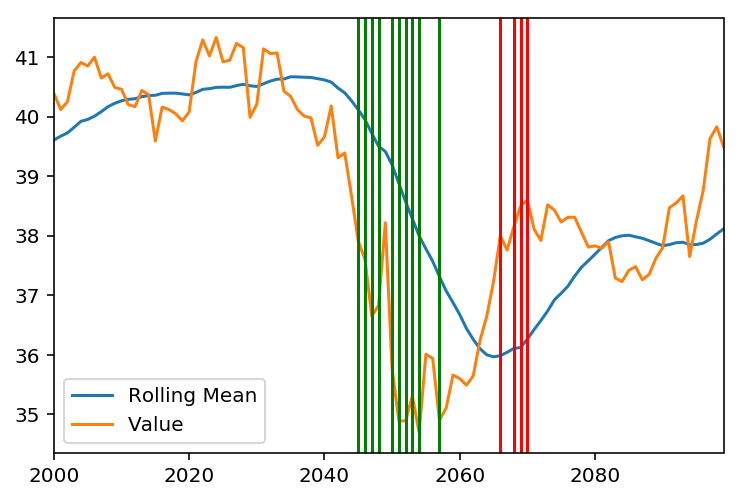

In [8]:
plot(2000, 2100)

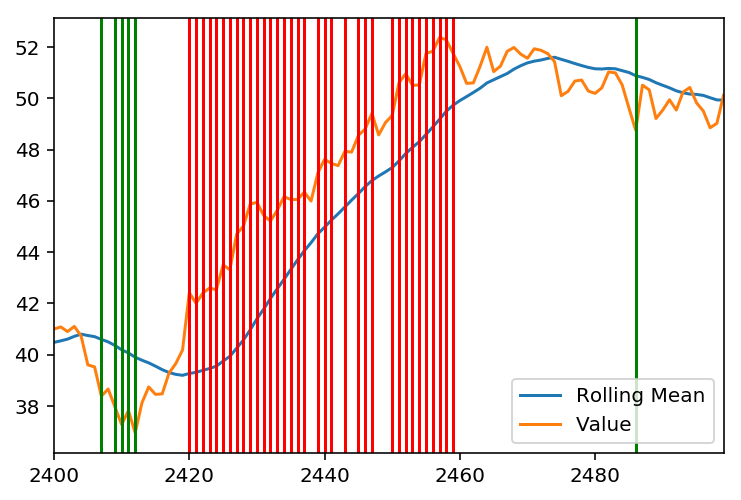

In [9]:
plot(2400, 2500)